In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
heart_data = pd.read_csv("./heart.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f350bccd588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f35084fc390>]], dtype=object)

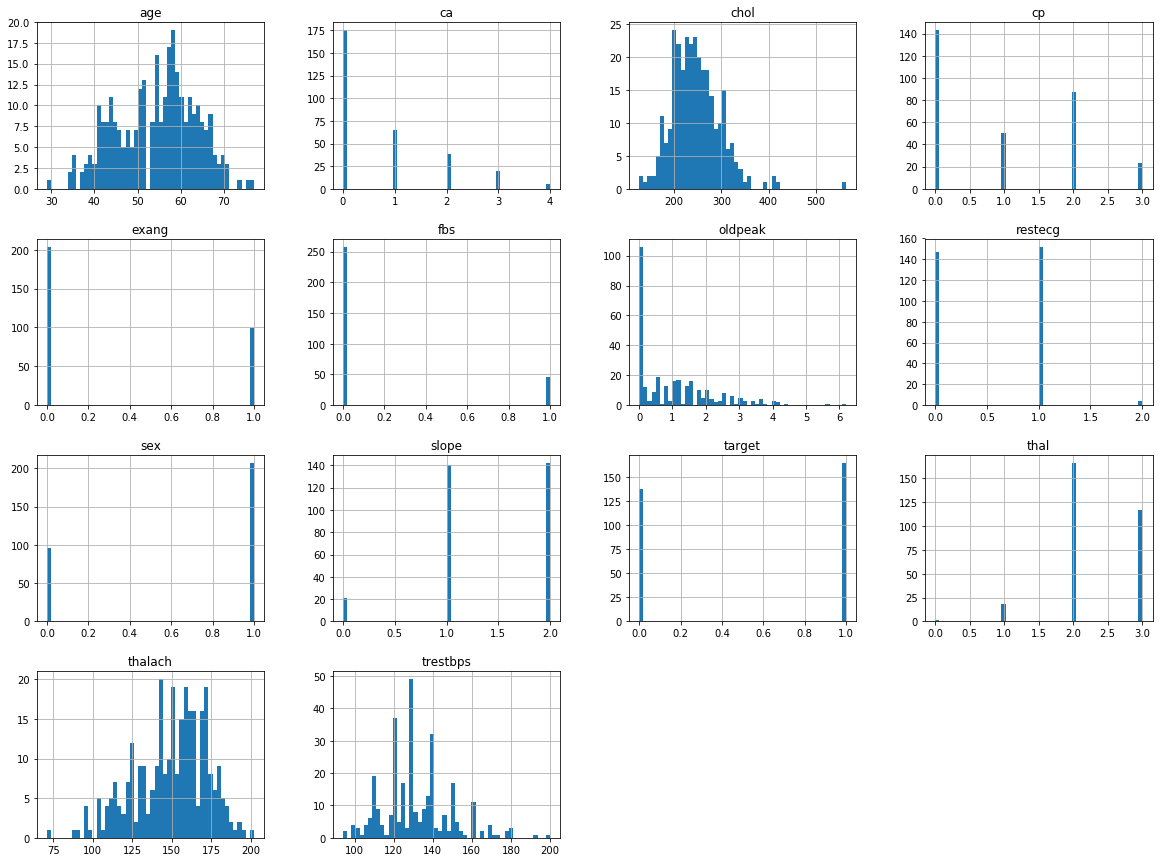

In [5]:
%matplotlib inline
heart_data.hist(bins = 50 , figsize = (20 , 15))

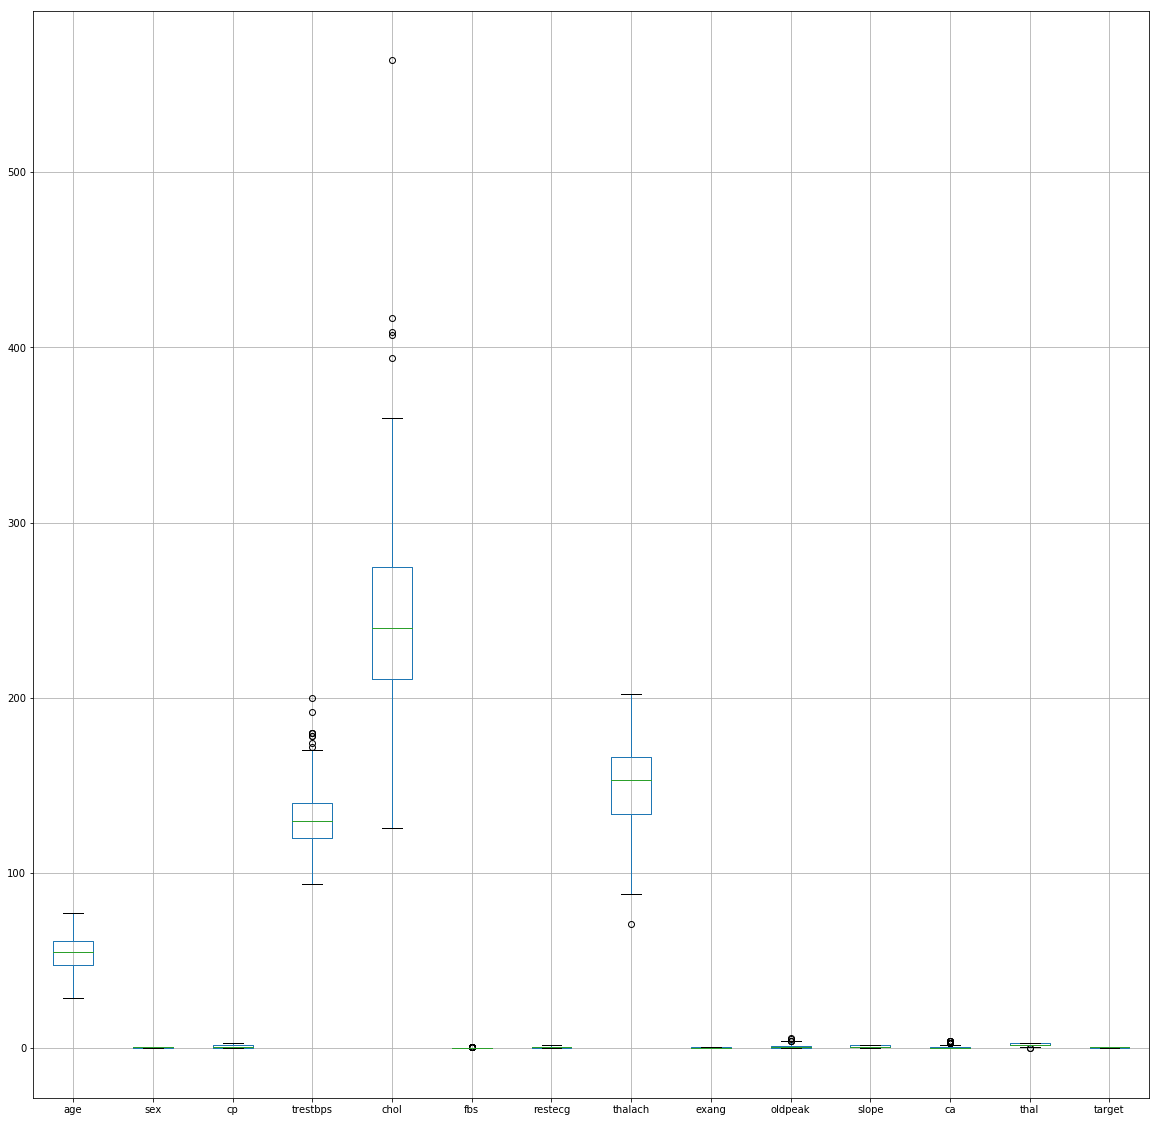

In [8]:
heart_data.boxplot(figsize = (20 , 20))

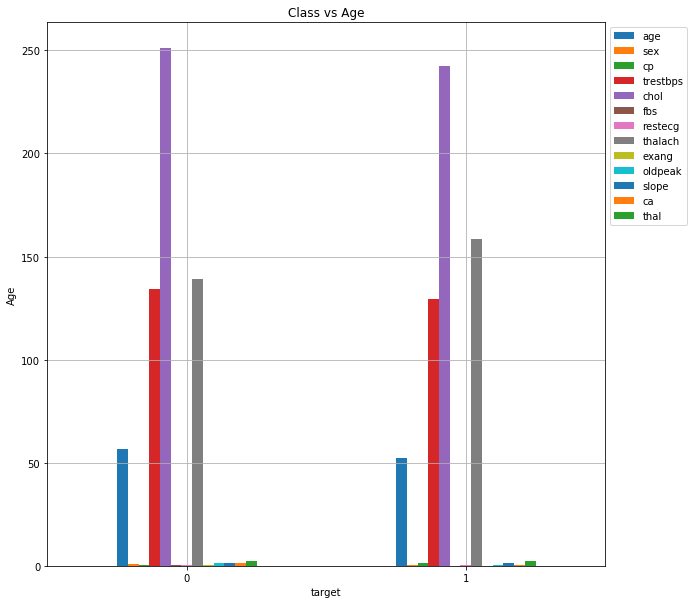

In [9]:
heart_data.groupby(by = "target").mean().plot(kind = "bar" , figsize = (10 , 10))
plt.title("Class vs Age")
plt.ylabel("Age")
plt.xticks(rotation = 0)
plt.grid(True)
plt.legend(loc = "upper left" , bbox_to_anchor = (1 , 1))

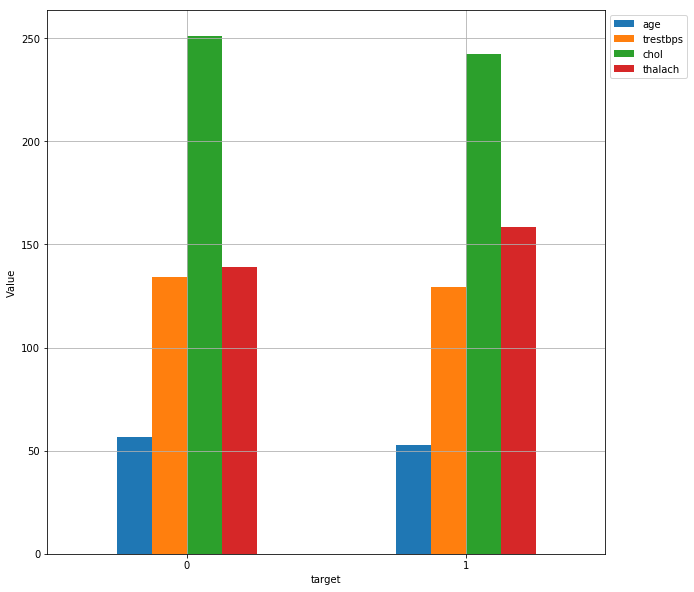

In [10]:

def visualize_relationship(dataframe , attribute_names):
    
    if "target" not in attribute_names:
        attribute_names.append("target")
        
        
    temp_data = dataframe[attribute_names].groupby("target")
    temp_data.mean().plot(kind = "bar" , figsize = (10 , 10))
    plt.ylabel("Value")
    plt.xticks(rotation = 1)
    plt.grid(True)
    plt.legend(loc = "upper left" , bbox_to_anchor = (1 , 1))
    



visualize_relationship(heart_data , ["age" , "trestbps" , "chol" , "thalach" , "target"])

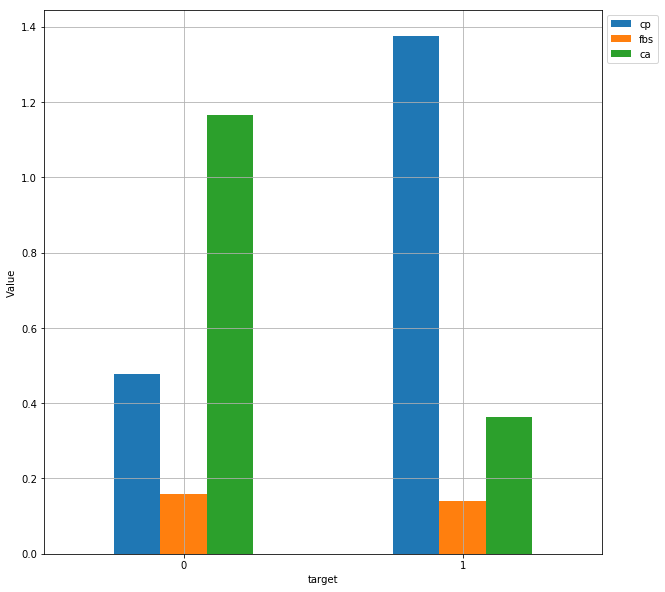

In [11]:
visualize_relationship(heart_data , ["cp" , "fbs" , "ca"])

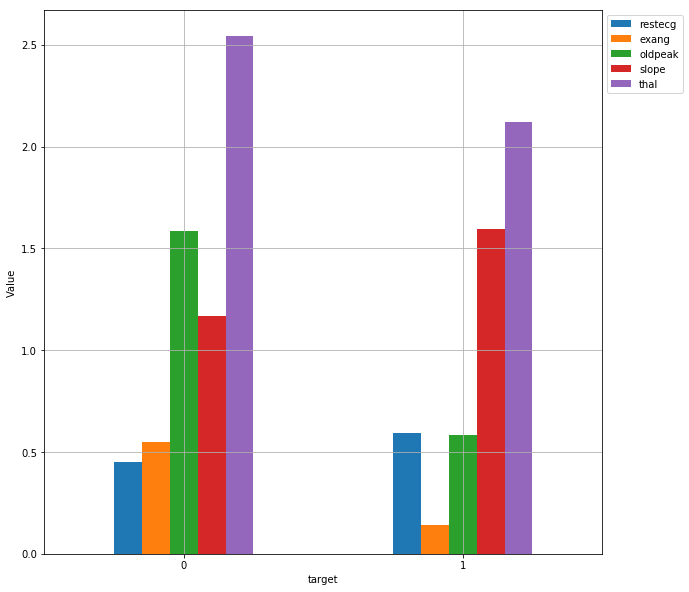

In [12]:
visualize_relationship(heart_data , ["restecg" , "exang" , "oldpeak" , "slope" , "thal"])

In [25]:
temp_data = heart_data.drop("target" , axis = 1)
corr = temp_data.corr()
print(corr)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

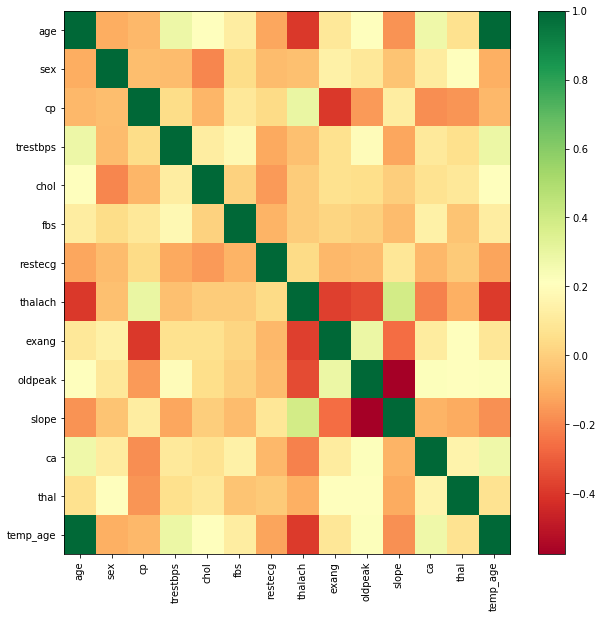

In [27]:

def plot_corr(df , size = 10):
    
    corr = df.corr()
    plt.figure(figsize = (size , size))
    plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr)) , corr.columns , rotation = "vertical")
    plt.yticks(range(len(corr)) , corr.columns)
    plt.show()
    
plot_corr(temp_data)

/home/musa/miniconda3/envs/machine_learning_env/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35061306a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f34fbdeffd0>]], dtype=object)

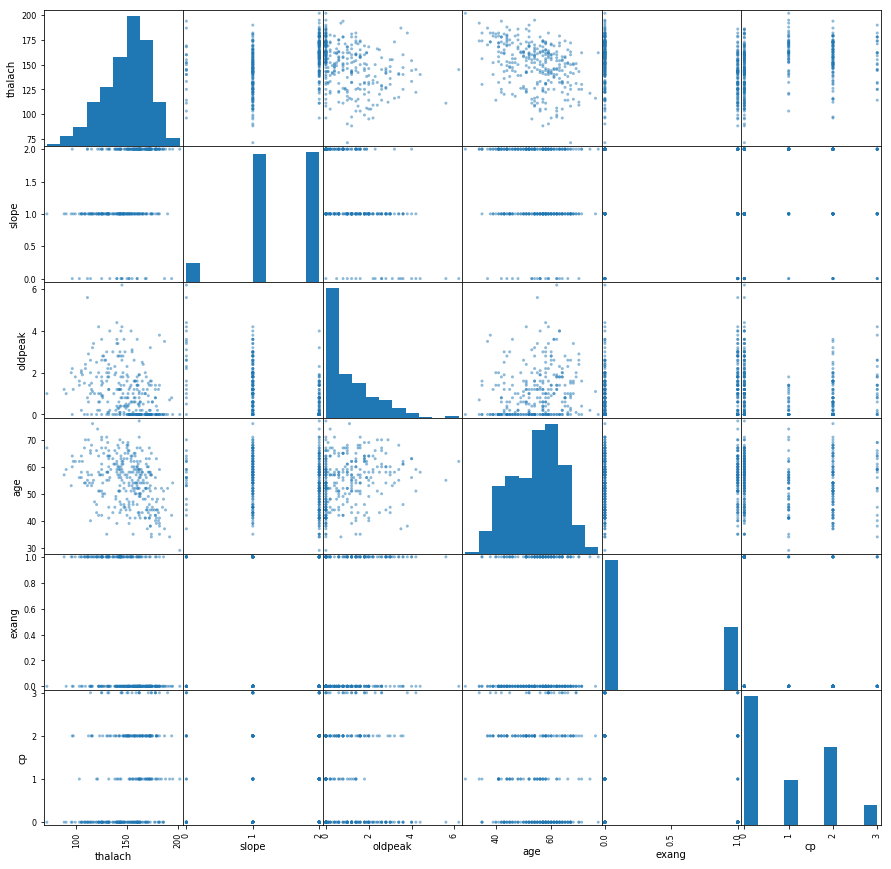

In [29]:
from pandas.tools.plotting import scatter_matrix

attributes = [ "thalach"  , "slope", "oldpeak",  "age" , "exang" , "cp"]
scatter_matrix(temp_data[attributes] , figsize = (15 , 15))

In [13]:
from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split(heart_data , test_size = 0.2 , random_state = 42)

In [14]:
len(train_set)

242

In [15]:
train_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0


In [19]:
train_set.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.462810,0.657025,0.991736,130.359504,246.842975,0.128099,0.553719,150.115702,0.314050,1.013223,1.421488,0.681818,2.301653,0.549587
std,9.204492,0.475687,1.022533,16.828858,52.795465,0.334893,0.530410,22.352398,0.465098,1.102577,0.607724,0.990620,0.593811,0.498566
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,1.000000,130.000000,239.500000,0.000000,1.000000,154.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,165.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


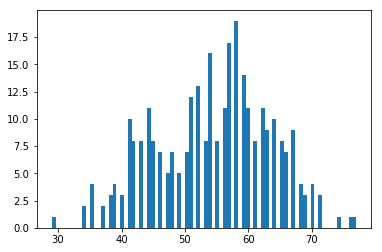

In [17]:
n , bins , patches = plt.hist(heart_data["age"] , bins = 80   )
plt.show()

In [18]:
heart_data["temp_age"] = heart_data["age"]
heart_data["temp_age"].where(heart_data["age"] < 68.0 , 68.0 , inplace = True)
heart_data["temp_age"].where(heart_data["age"] > 40.0 , 40.0 , inplace = True)
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,temp_age
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,54.419142
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,8.435138
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,47.500000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,55.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,61.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,68.000000


In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2 , random_state = 42)

for train_index , test_index in split.split(heart_data , heart_data["temp_age"]):
    strat_train_set = heart_data.loc[train_index]
    strat_test_set = heart_data.loc[test_index]

In [22]:
def temp_age_proportion(df):
    return df["temp_age"].value_counts() / len(df)

train_set , test_set = train_test_split(heart_data , test_size = 0.2 , random_state = 42)
compare_props = pd.DataFrame({
    "Overall" : temp_age_proportion(heart_data),
    "Stratified" : temp_age_proportion(strat_test_set),
    "Random" : temp_age_proportion(test_set),
}).sort_index()

compare_props["Random %Error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat.  %Error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Random,Stratified,Random %Error,Strat. %Error
40,0.062706,0.065574,0.065574,4.572908,4.572908
41,0.033003,0.032787,0.032787,-0.655738,-0.655738
42,0.026403,NaN,0.032787,NaN,24.180328
43,0.026403,0.016393,0.032787,-37.909836,24.180328
44,0.036304,0.049180,0.032787,35.469449,-9.687034
45,0.026403,0.049180,0.032787,86.270492,24.180328
46,0.023102,0.049180,0.016393,112.880562,-29.039813
47,0.016502,NaN,0.016393,NaN,-0.655738
48,0.023102,0.032787,0.016393,41.920375,-29.039813
49,0.016502,NaN,0.016393,NaN,-0.655738


In [23]:
test_set["temp_age"].sort_index().value_counts()

57    5
68    4
40    4
59    4
52    4
50    3
46    3
56    3
44    3
54    3
45    3
62    3
41    2
64    2
48    2
51    2
58    2
60    2
61    2
55    1
43    1
67    1
66    1
63    1
Name: temp_age, dtype: int64

In [30]:
heart_data["temp_age"].value_counts().sort_index()

40    19
41    10
42     8
43     8
44    11
45     8
46     7
47     5
48     7
49     5
50     7
51    12
52    13
53     8
54    16
55     8
56    11
57    17
58    19
59    14
60    11
61     8
62    11
63     9
64    10
65     8
66     7
67     9
68    17
Name: temp_age, dtype: int64

In [31]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("temp_age", axis=1, inplace=True)

In [32]:
strat_train_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3,0
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1


In [33]:
strat_train_X = strat_train_set.drop("target" , axis = 1)
strat_train_y = strat_train_set["target"]

len(strat_train_X) == len(strat_train_y)

True

In [34]:
strat_test_X = strat_test_set.drop("target" , axis = 1)
strat_test_y = strat_test_set["target"]

len(strat_test_X) == len(strat_test_y)

True

In [35]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit(strat_train_X)
strat_train_X_std  = std_scale.transform(strat_train_X)
strat_test_X_std = std_scale.transform(strat_test_X)

In [36]:
from sklearn.tree import DecisionTreeClassifier

des_classifier = DecisionTreeClassifier(random_state = 42)
des_classifier.fit(strat_train_X_std , strat_train_y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def draw_confusion_matrix(y_test , predictions):
    confmat = confusion_matrix(y_true = y_test , y_pred = predictions)
    
    fig , ax = plt.subplots(figsize = (12 , 10))
    ax.matshow(confmat , cmap = plt.cm.Blues)
    
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text( x = j , y = i , s  = confmat[i , j] , va = "center" , ha = "center")
            
    plt.xlabel("Prediction Label")
    plt.ylabel("true label")
    plt.show()


def show_classifier_result(cls , X_test , y_test):
    
    predictions = cls.predict(X_test)
    score = accuracy_score(predictions , y_test)
    
    print("Accuracy Score : {}".format(score))
    draw_confusion_matrix(y_test , predictions)
    

Accuracy Score : 0.7213114754098361


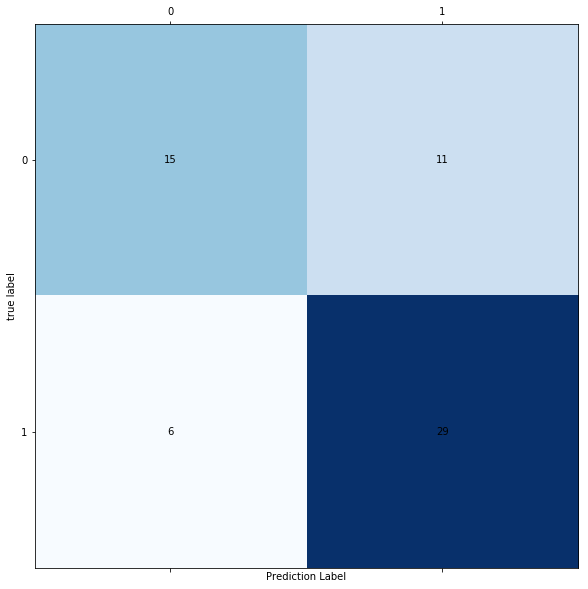

In [38]:
show_classifier_result(des_classifier , strat_test_X_std , strat_test_y)

In [39]:
strat_train_X_std.shape

(242, 13)

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)
strat_train_X_std_lda  = lda.fit_transform(strat_train_X_std , strat_train_y)
strat_test_X_std_lda  = lda.transform(strat_test_X_std)

In [42]:
strat_train_X_std_lda.shape

(242, 1)

Accuracy Score : 0.7540983606557377


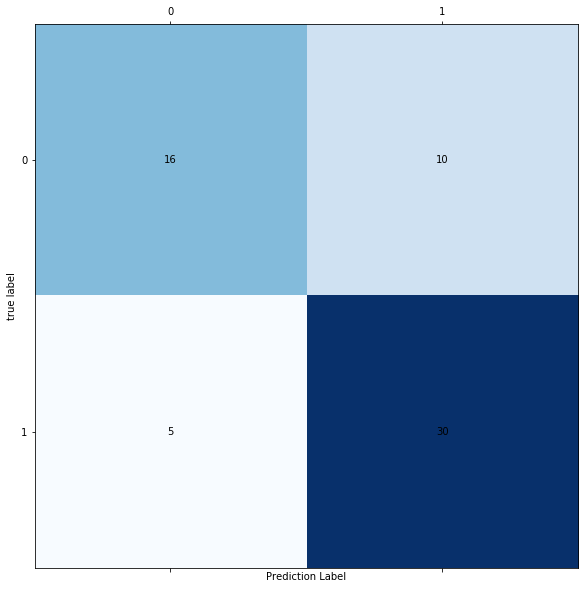

In [43]:
des_classifier.fit(strat_train_X_std_lda , strat_train_y)
show_classifier_result(des_classifier , strat_test_X_std_lda , strat_test_y)

Fold : 1 , Score : 0.68
Fold : 2 , Score : 0.88
Fold : 3 , Score : 0.9583333333333334
Fold : 4 , Score : 0.7916666666666666
Fold : 5 , Score : 0.7916666666666666
Fold : 6 , Score : 0.7916666666666666
Fold : 7 , Score : 0.7916666666666666
Fold : 8 , Score : 0.875
Fold : 9 , Score : 0.7916666666666666
Fold : 10 , Score : 0.7916666666666666
Using best score
Accuracy Score : 0.9583333333333334


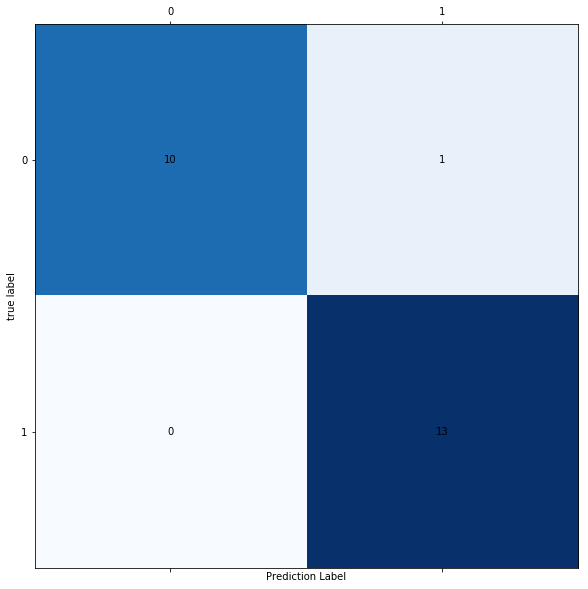

In [44]:
from sklearn.model_selection import StratifiedKFold
def test_stratified_fold(clf , X , y , n_fold):
    
    best_score = -100
    best_index = 0
    best_data = None
    
    skf = StratifiedKFold(n_splits= n_fold)
    
    current_index = 0
    
    for train_index , test_index in skf.split(X , y):
        X_train , y_train = X[train_index] , y.iloc[train_index]
        X_test , y_test = X[test_index] , y.iloc[test_index]
        
        clf.fit(X_train , y_train)
        predictions = clf.predict(X_test)
        score = accuracy_score(y_test , predictions)
        print("Fold : {} , Score : {}".format(current_index + 1,score))
        
        if score > best_score:
            best_index = current_index
            best_score = score
            best_data = (X_train , y_train , X_test , y_test)
            
        current_index += 1
        
    print("Using best score")
    
    clf.fit(best_data[0] , best_data[1])
    show_classifier_result(clf , best_data[2] , best_data[3])
   
        
        
       
      
    
test_stratified_fold(des_classifier , strat_train_X_std_lda , strat_train_y , 10)

Accuracy Score : 0.7868852459016393


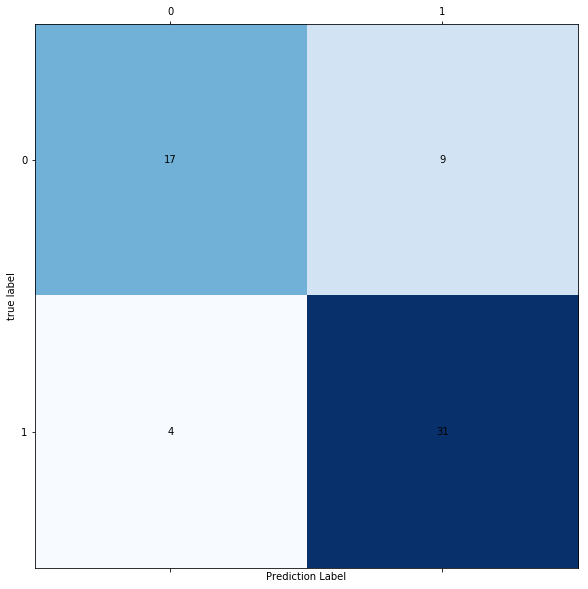

Fold : 1 , Score : 0.84
Fold : 2 , Score : 0.92
Fold : 3 , Score : 0.9583333333333334
Fold : 4 , Score : 0.8333333333333334
Fold : 5 , Score : 0.8333333333333334
Fold : 6 , Score : 0.8333333333333334
Fold : 7 , Score : 0.8333333333333334
Fold : 8 , Score : 0.875
Fold : 9 , Score : 0.8333333333333334
Fold : 10 , Score : 0.8333333333333334
Using best score
Accuracy Score : 0.9583333333333334


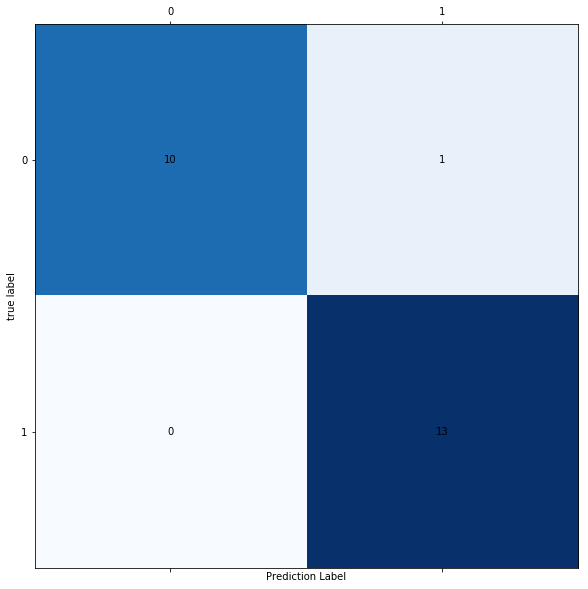

In [45]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(strat_train_X_std_lda, strat_train_y) 



show_classifier_result(neigh , strat_test_X_std_lda , strat_test_y)

test_stratified_fold(neigh  , strat_train_X_std_lda , strat_train_y , 10)